# Oqani et. al. 2025: Star Alignment > AnnData Preprocessing & Embedding

## Environment Setup (230707)

Install software from pip, apt, and Github.  Load modules, configure workspace settings.

In [ ]:
# No editing of this code cell is required

# Environment Setup: verified working w/ Python 3.9.16 on 230316

# print python version to screen
!python --version

# pip install software
!pip install -q scanpy==1.9.3 leidenalg==0.8.10 harmonypy==0.0.9 scrublet==0.2.3
!wget -qc https://raw.githubusercontent.com/wagnerde/scTools-py/master/scTools_dew.py

# import python packages
import os, sys
import numpy as np
import pandas as pd
import scanpy as sc
import scTools_dew as dew
import warnings


# set some ScanPy settings
sc.set_figure_params(dpi=120, figsize=[4,4], fontsize=7)
sc.settings.verbosity = 0

Python 3.10.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.3 MB/s eta 0:00:00


## Download Star Count Matrices

Clean up the library directory names:
```
cd /content/wynton/group/wagner/NIMBUS/FASTQ/230705_NovaSeq_PR/
mv maltepee-FB1 FB1
mv maltepee-FB2 FB2
mv maltepee-FB3 FB3
mv maltepee-IVF1 IVF1
mv maltepee-IVF2 IVF2
mv maltepee-IVF3 IVF3
cd /content/
```

## Load into AnnData


In [ ]:
input_path = '/content/wynton/group/wagner/NIMBUS/FASTQ/230705_NovaSeq_PR/'
library_ids = ['FB1','FB2','FB3','IVF1','IVF2','IVF3']

adata_dict = dew.load_starsolo(library_ids, input_path, filt_path='filtered')

In [ ]:
adata_dict

{'FB1': AnnData object with n_obs × n_vars = 14769 × 32285
     obs: 'library_id'
     var: 'gene_ids', 'feature_types'
     layers: 'unspliced', 'spliced', 'ambiguous',
 'FB2': AnnData object with n_obs × n_vars = 8585 × 32285
     obs: 'library_id'
     var: 'gene_ids', 'feature_types'
     layers: 'unspliced', 'spliced', 'ambiguous',
 'FB3': AnnData object with n_obs × n_vars = 6822 × 32285
     obs: 'library_id'
     var: 'gene_ids', 'feature_types'
     layers: 'unspliced', 'spliced', 'ambiguous',
 'IVF1': AnnData object with n_obs × n_vars = 11486 × 32285
     obs: 'library_id'
     var: 'gene_ids', 'feature_types'
     layers: 'unspliced', 'spliced', 'ambiguous',
 'IVF2': AnnData object with n_obs × n_vars = 8281 × 32285
     obs: 'library_id'
     var: 'gene_ids', 'feature_types'
     layers: 'unspliced', 'spliced', 'ambiguous',
 'IVF3': AnnData object with n_obs × n_vars = 9716 × 32285
     obs: 'library_id'
     var: 'gene_ids', 'feature_types'
     layers: 'unspliced', 'spli

## Perform Quality Filtering

### Perform Cell Barcode Filtering
Uses a weighted histogram, rather than a cumulative histogram, to estimate the lower bound transcripts (UMIs) per barcode threshold.

FB1


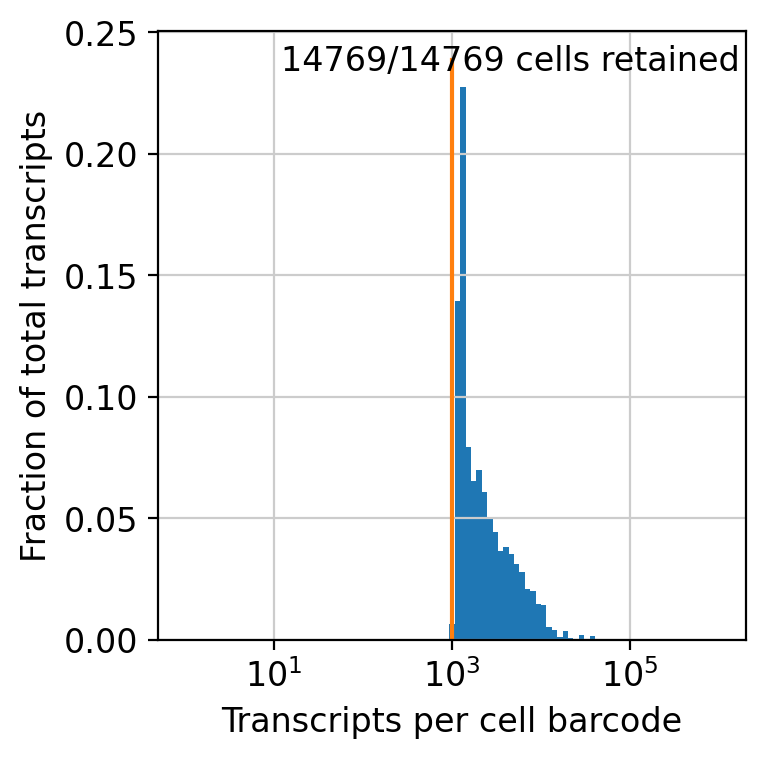

Barcode Filtering  (14769/14769 cells retained)

FB2


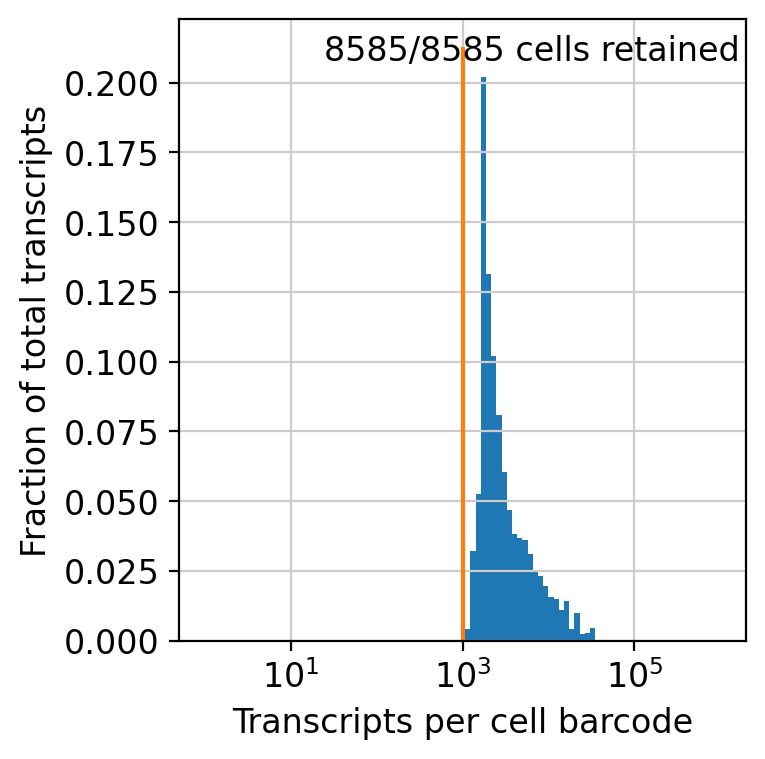

Barcode Filtering  (8585/8585 cells retained)

FB3


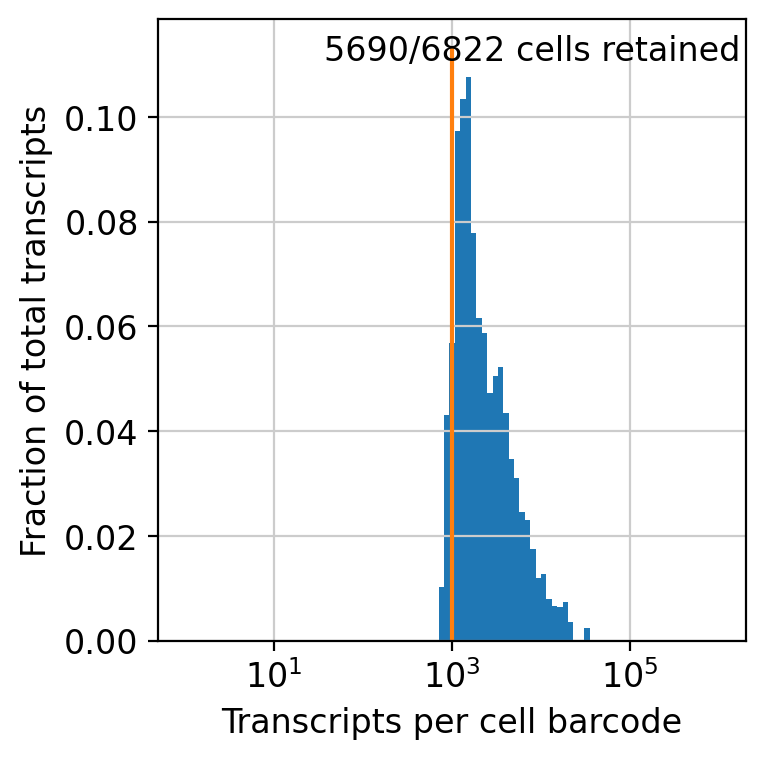

Barcode Filtering  (5690/6822 cells retained)

IVF1


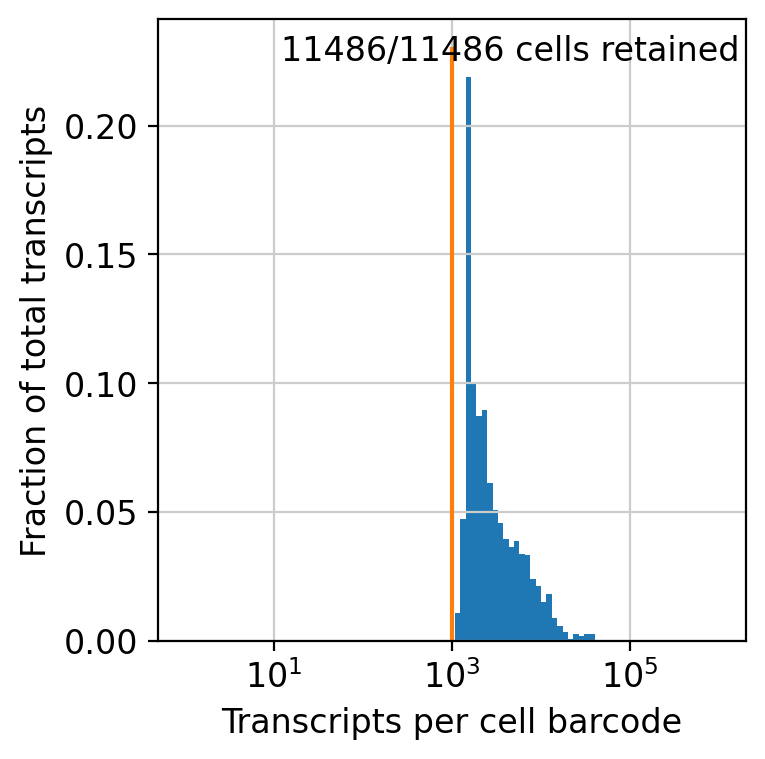

Barcode Filtering  (11486/11486 cells retained)

IVF2


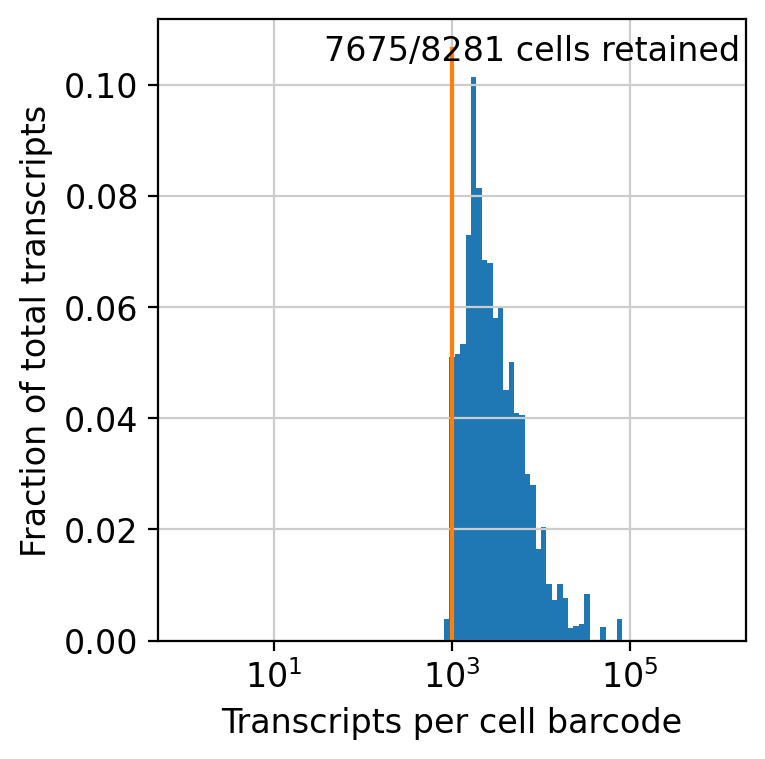

Barcode Filtering  (7675/8281 cells retained)

IVF3


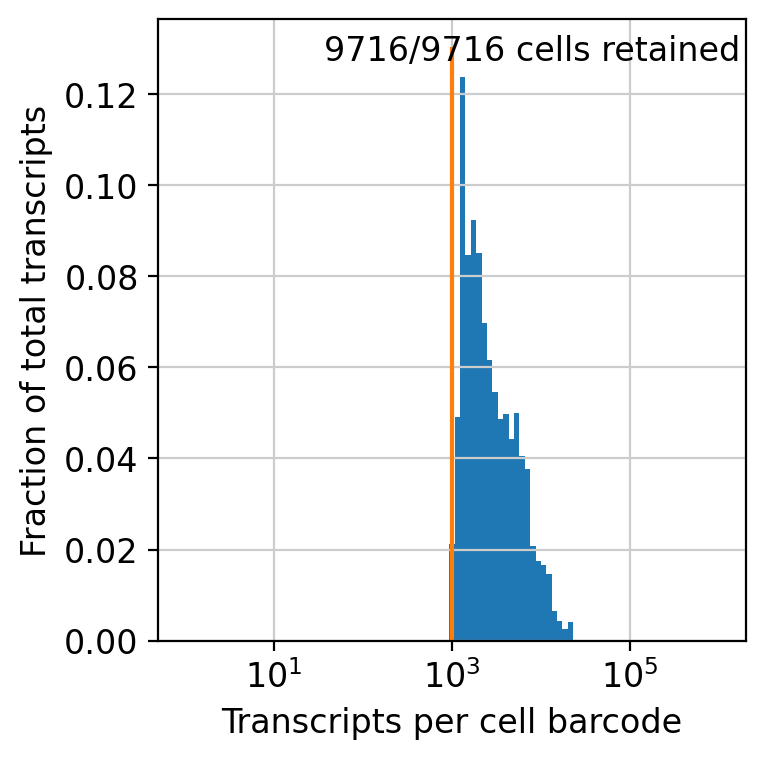

Barcode Filtering  (9716/9716 cells retained)



In [ ]:
ab_threshold = [1000]
ab_filter_flag = True

for n, lib in enumerate(library_ids):
  print(lib)
  dew.filter_abundant_barcodes(adata_dict[lib], filter_cells=ab_filter_flag, threshold=ab_threshold)


### Perform Mitochondrial Filtering

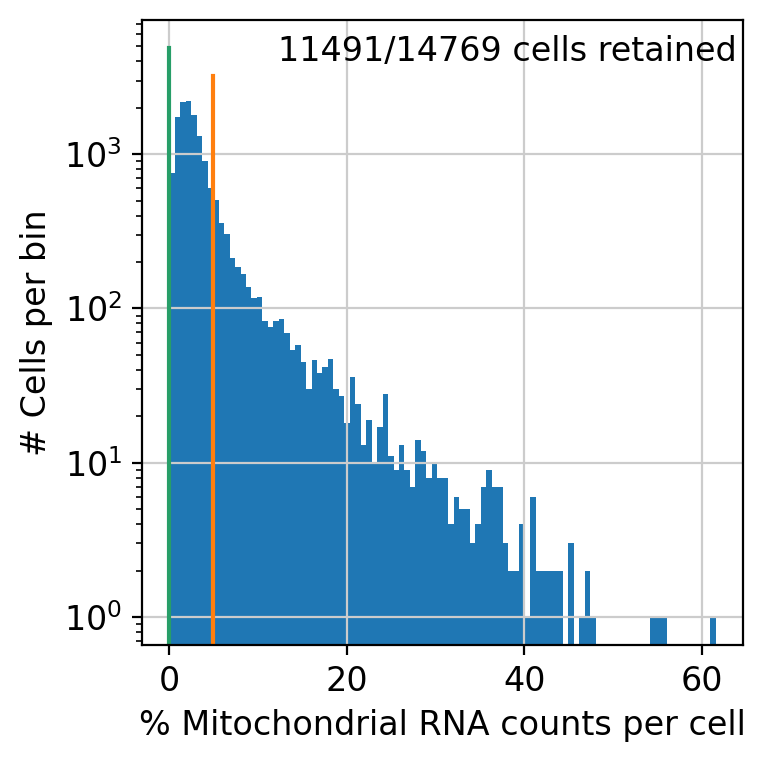

Mito-Filtering  (11491/14769 cells retained)



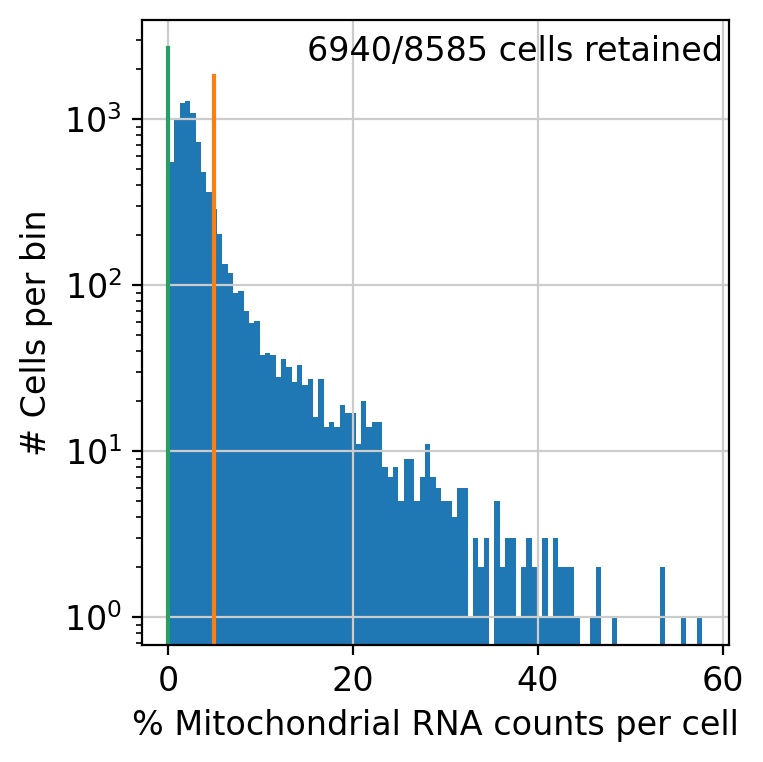

Mito-Filtering  (6940/8585 cells retained)



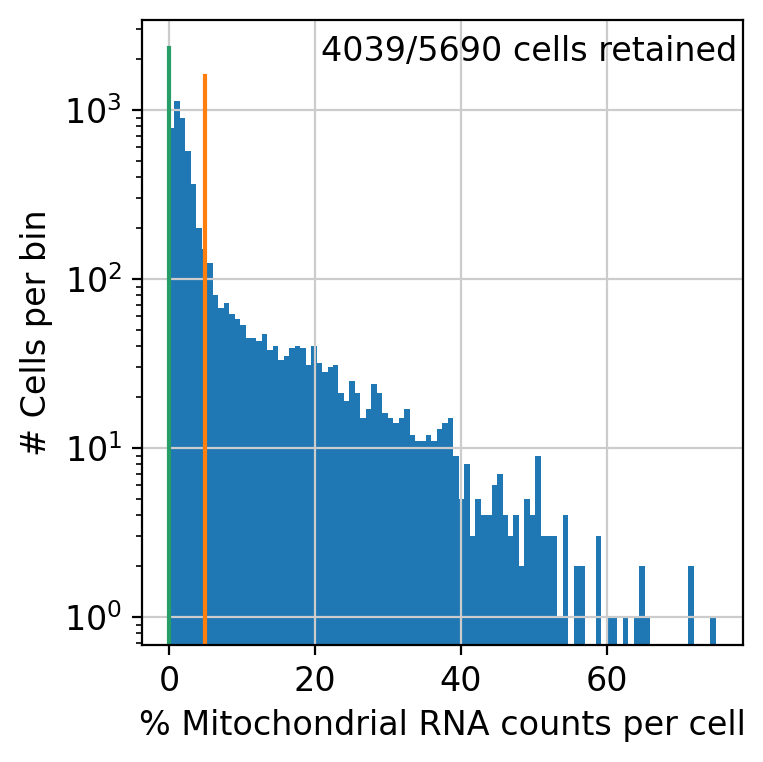

Mito-Filtering  (4039/5690 cells retained)



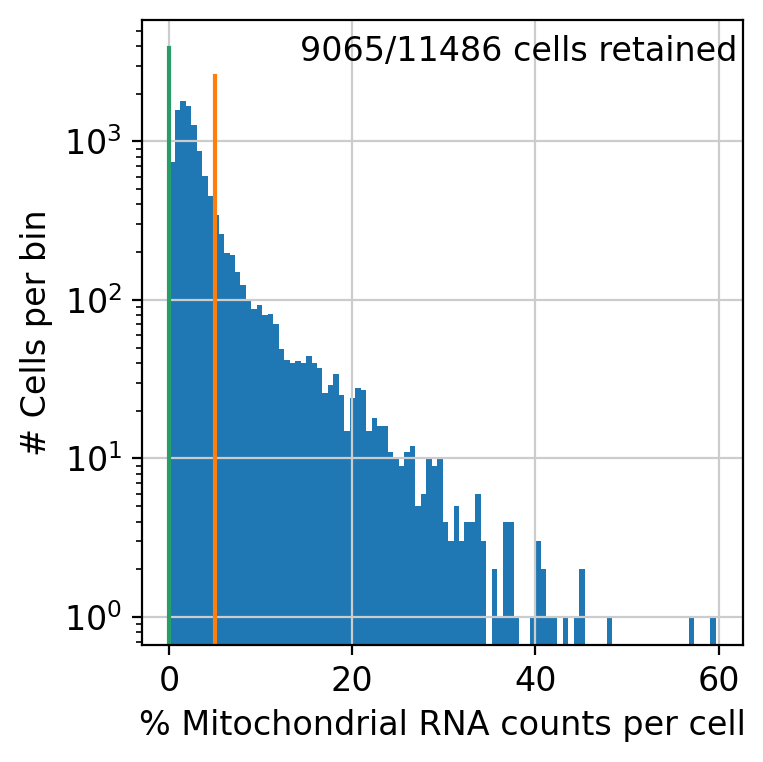

Mito-Filtering  (9065/11486 cells retained)



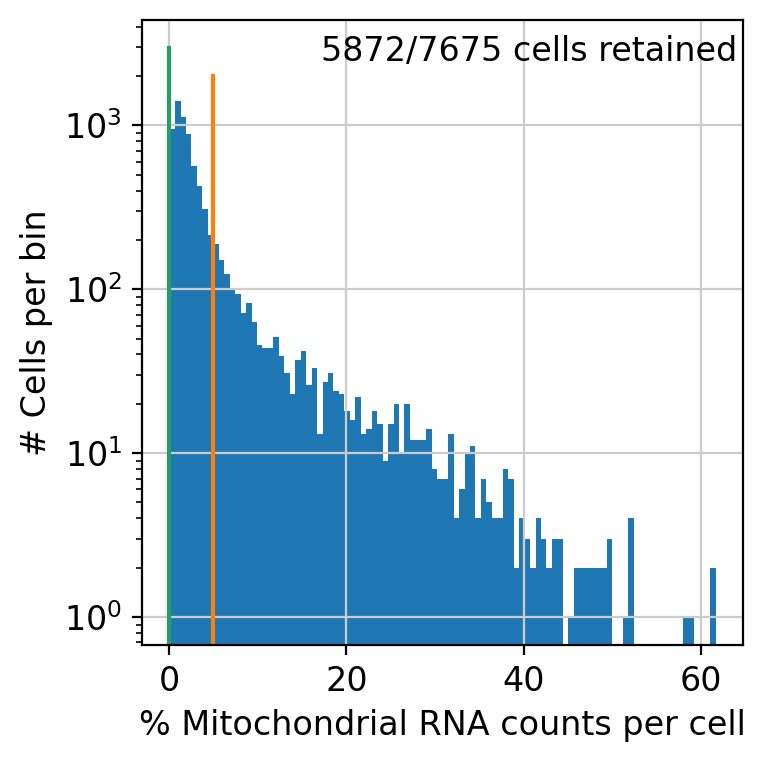

Mito-Filtering  (5872/7675 cells retained)



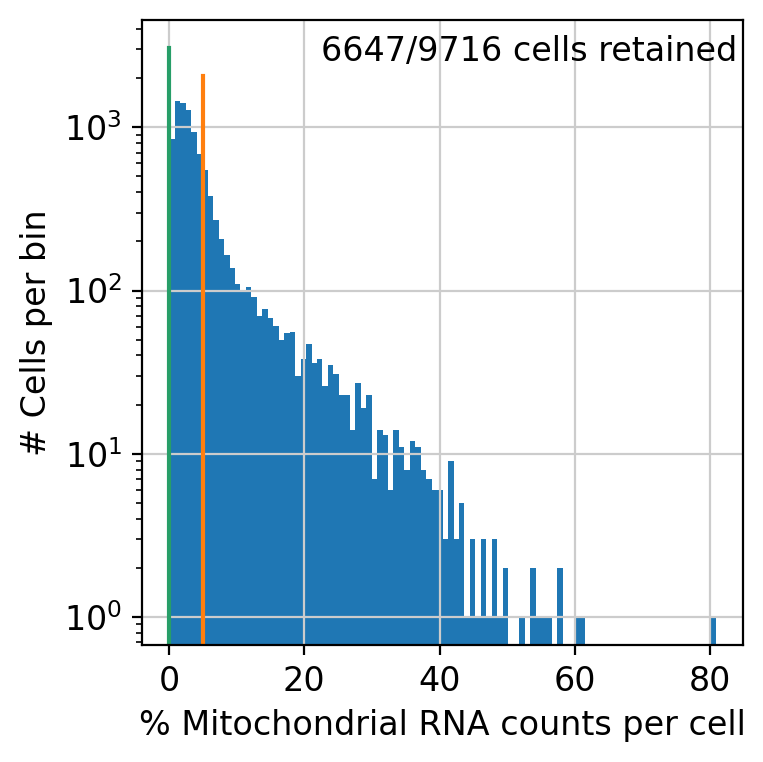

Mito-Filtering  (6647/9716 cells retained)



In [ ]:
mito_upper_threshold = 5
mito_filter_flag = True

for n, lib in enumerate(library_ids):
  adata_dict[lib] = dew.filter_mito(adata_dict[lib], filter_cells=mito_filter_flag, upper_threshold=mito_upper_threshold)

### Perform Cell Doublet Filtering

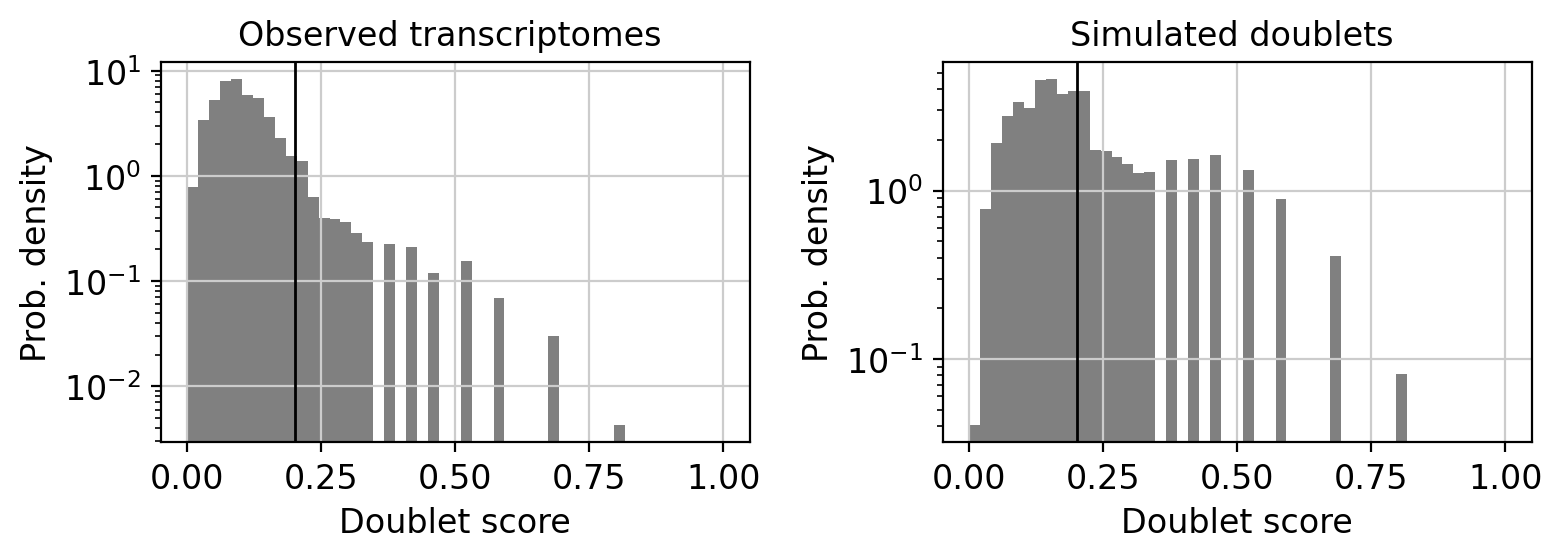

Doublet Filtering  (10437/11491 cells retained)



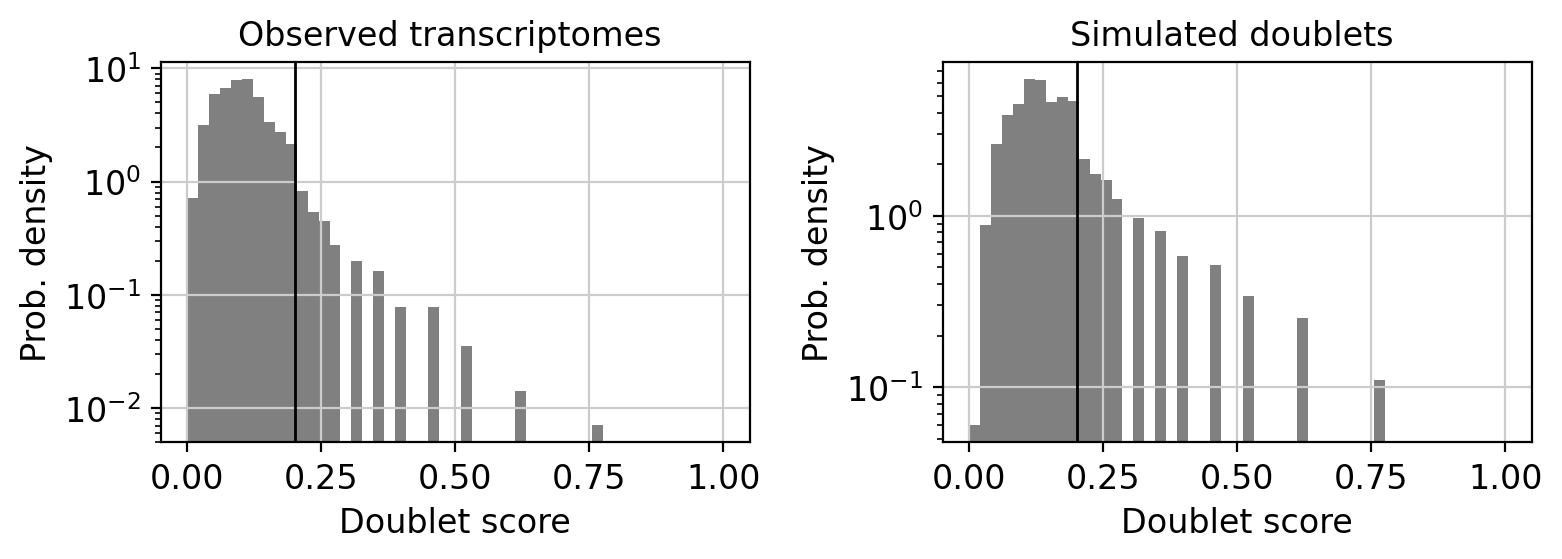

Doublet Filtering  (6427/6940 cells retained)



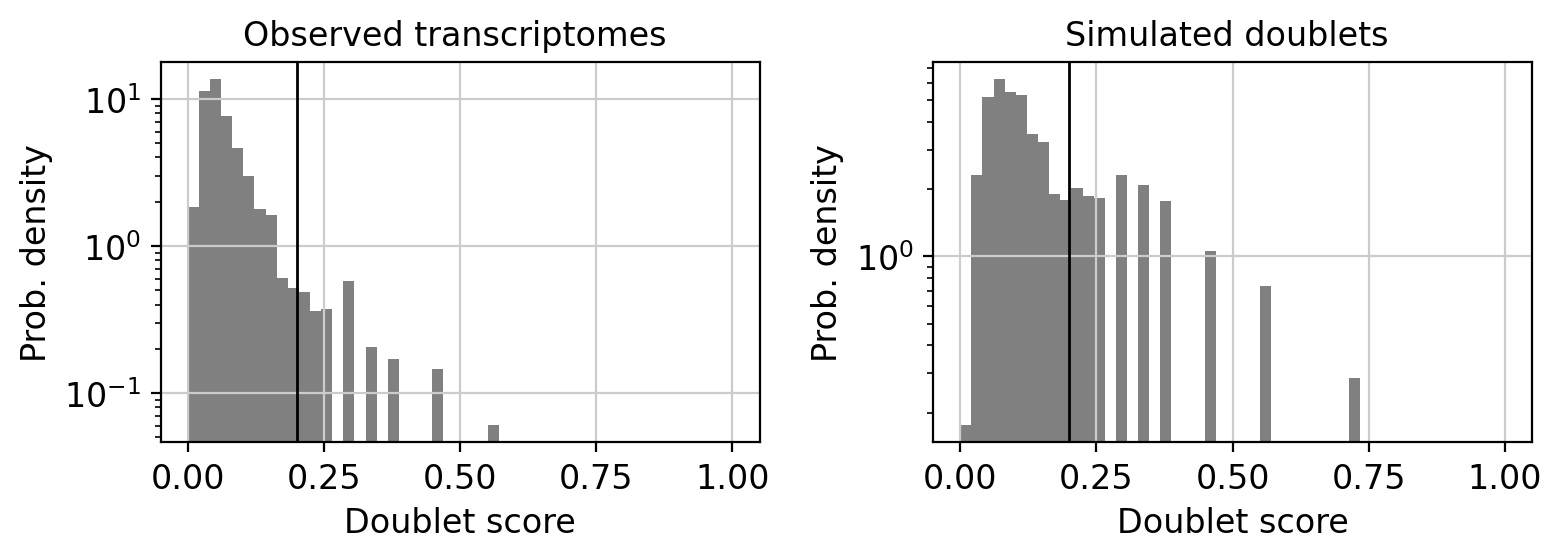

Doublet Filtering  (3842/4039 cells retained)



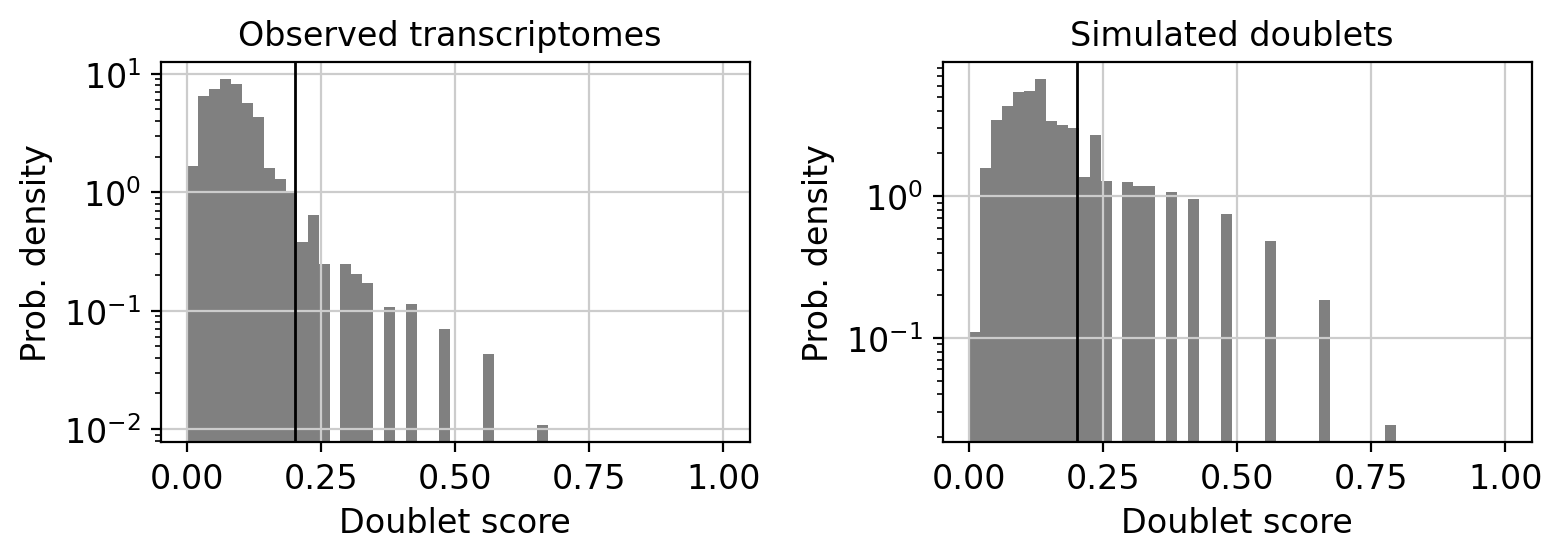

Doublet Filtering  (8650/9065 cells retained)



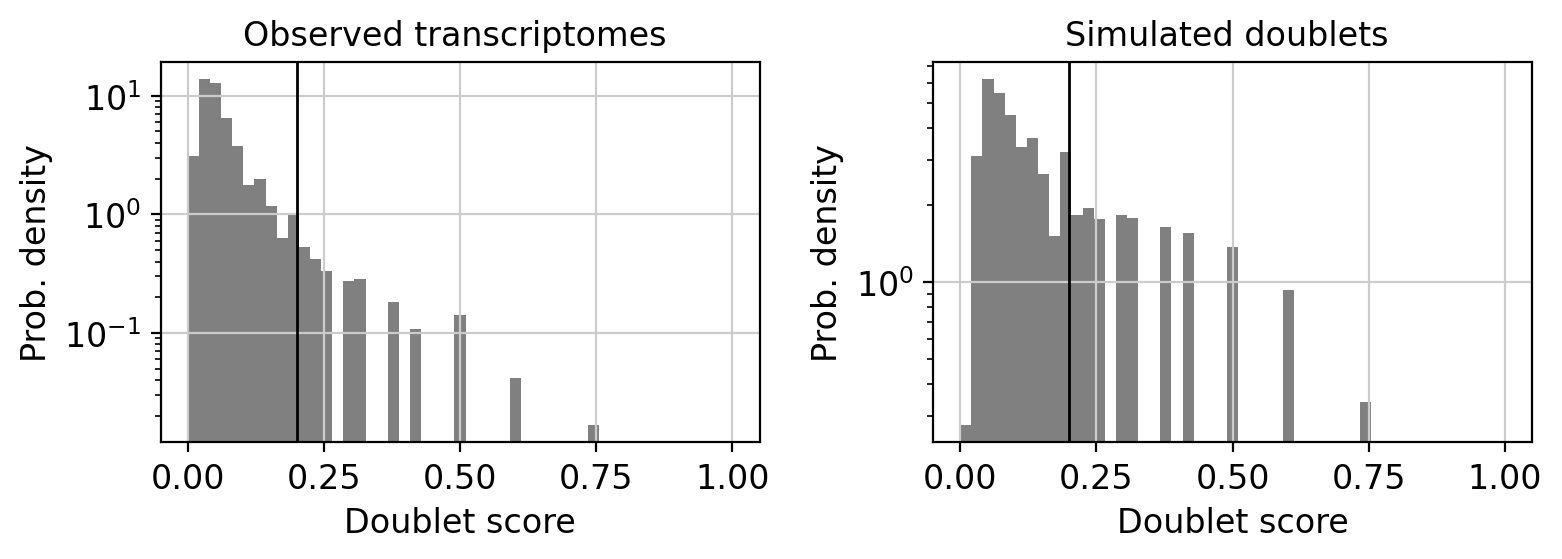

Doublet Filtering  (5532/5872 cells retained)



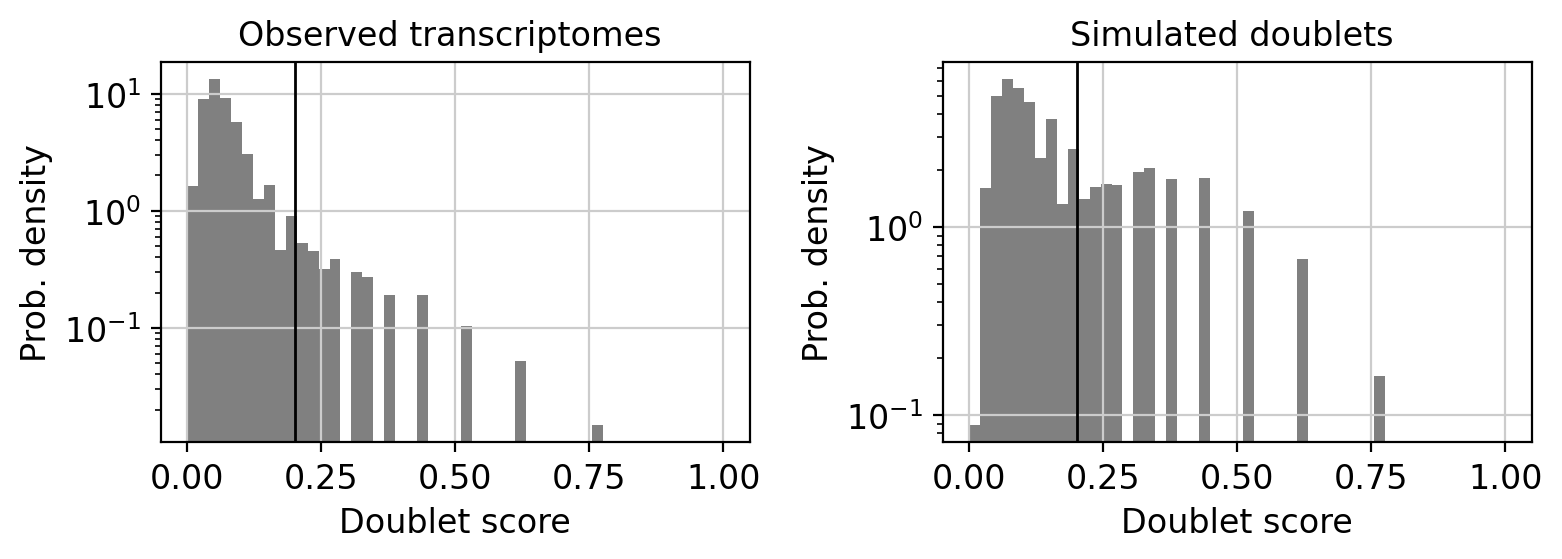

Doublet Filtering  (6266/6647 cells retained)



In [ ]:
scrub_threshold = 0.20
scrub_filter_flag = True

for n, lib in enumerate(library_ids):
  adata_dict[lib] = dew.filter_scrublet(adata_dict[lib], threshold=scrub_threshold, filter_cells=scrub_filter_flag)

## Merge Libraries


In [ ]:
if 'adata' in globals(): del adata
adata = adata_dict['FB1'].concatenate(adata_dict['FB2'],
                                      adata_dict['FB3'],
                                      adata_dict['IVF1'],
                                      adata_dict['IVF2'],
                                      adata_dict['IVF3'])

print('\n', adata)


 AnnData object with n_obs × n_vars = 41154 × 32285
    obs: 'library_id', 'total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'doublet_score', 'predicted_doublet', 'batch'
    var: 'gene_ids', 'feature_types', 'mito', 'ribo', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells_by_counts-3', 'mean_counts-3', 'log1p_mean_counts-3', 'pct_dropo

## Save Quality-Filtered Raw Counts h5ad

In [ ]:
adata.write('Oqani2025_raw.h5ad', compression='gzip')

## Load AnnData


In [ ]:
if 'adata' in globals(): del adata
adata = sc.read_h5ad('Oqani2025_raw.h5ad')
adata

## Quick QC plots

In [ ]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

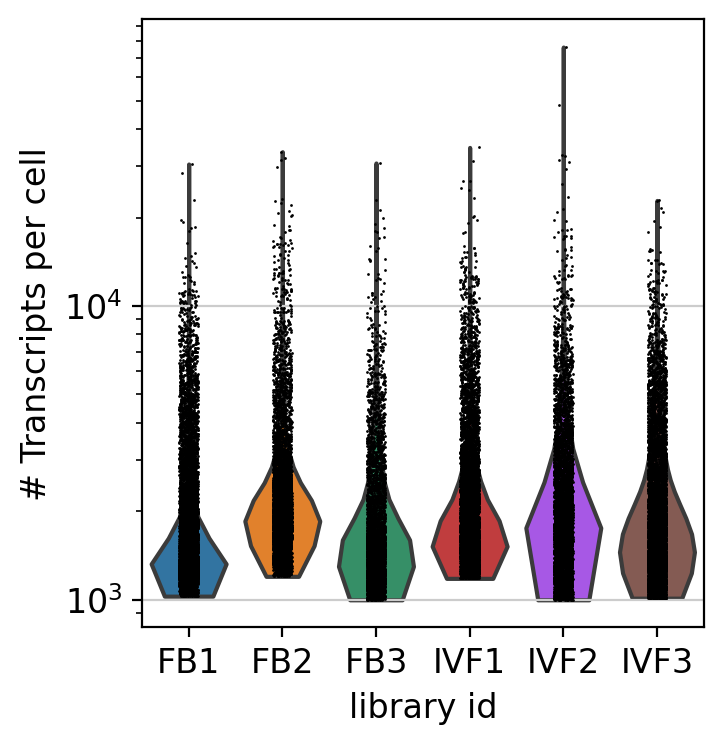

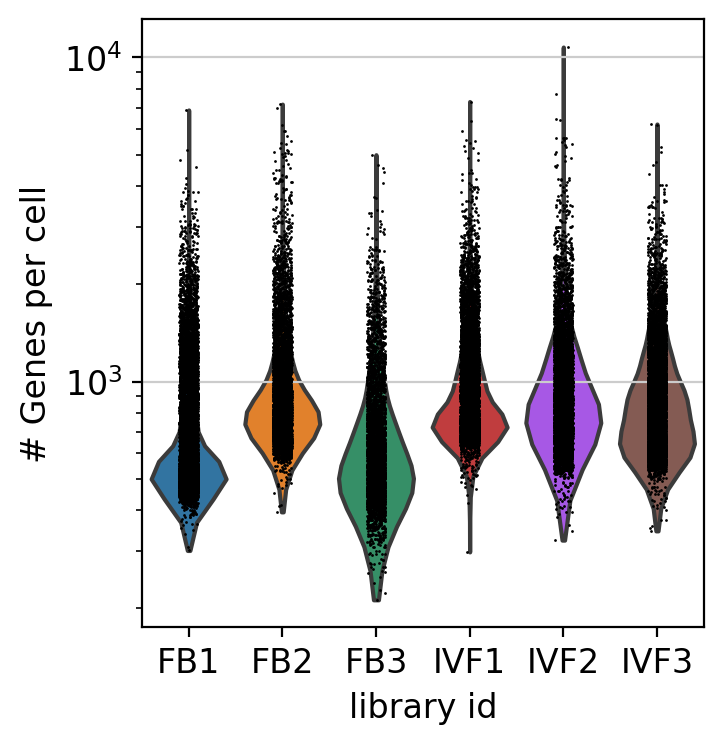

UMI per Cell  Genes per Cell
FB1    1940.756958      758.051643
FB2    2577.664795     1028.151237
FB3    2104.635498      754.109318
IVF1   2403.167725     1028.626474
IVF2   2521.592285     1050.596891
IVF3   2469.351807     1008.796202

In [ ]:
# Summarize # transcripts and genes detected per cell
sc.pl.violin(adata, 'total_counts', groupby='library_id', xlabel='', ylabel='# Transcripts per cell', log=True)
sc.pl.violin(adata, 'n_genes_by_counts', groupby='library_id', xlabel='', ylabel='# Genes per cell', log=True)
dew.get_sampling_stats(adata, groupby='library_id')


## Process and Normalize

In [ ]:
adata.layers['raw_nolog'] = adata.X.copy()
adata.layers['raw'] = np.log1p(adata.X.copy())
sc.pp.normalize_total(adata, target_sum=1e6, inplace=True) # TPM Normalization
adata.layers['tpm_nolog'] = adata.X.copy()
adata.layers['tpm'] = np.log1p(adata.X.copy())
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key='batch')
sc.pp.scale(adata)

## Compute Embeddings and Perform Clustering

In [ ]:
sc.set_figure_params(dpi=120, figsize=[4,4], fontsize=7)

Performing PCA on data matrix
Performing PCA on randomized data matrices
Iteration 20 / 20

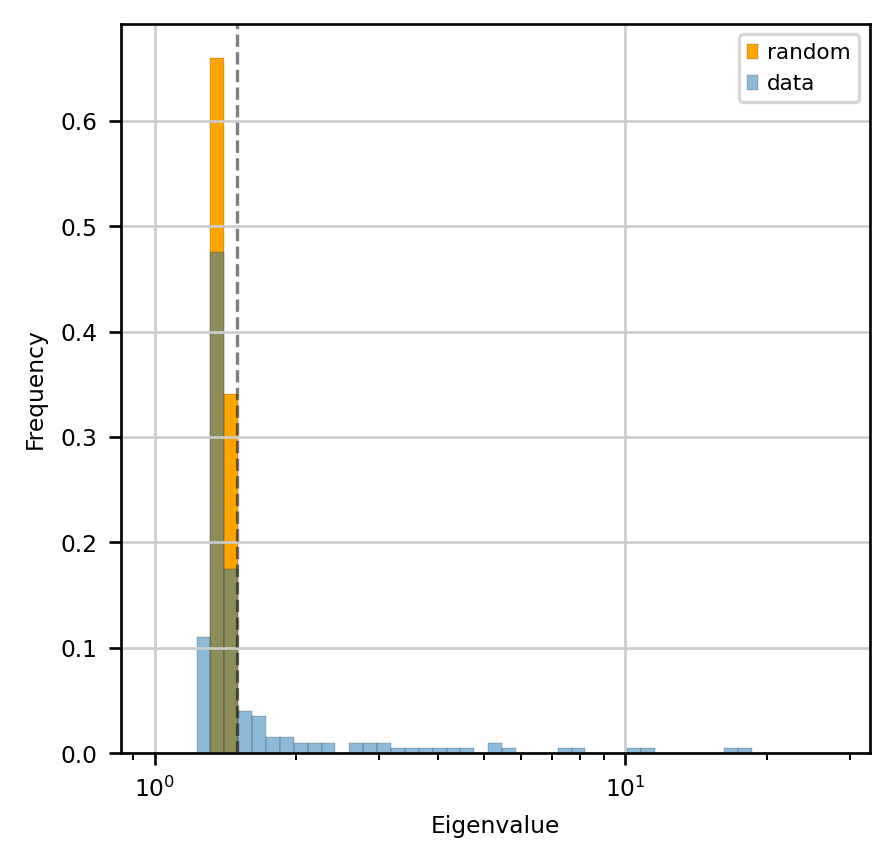

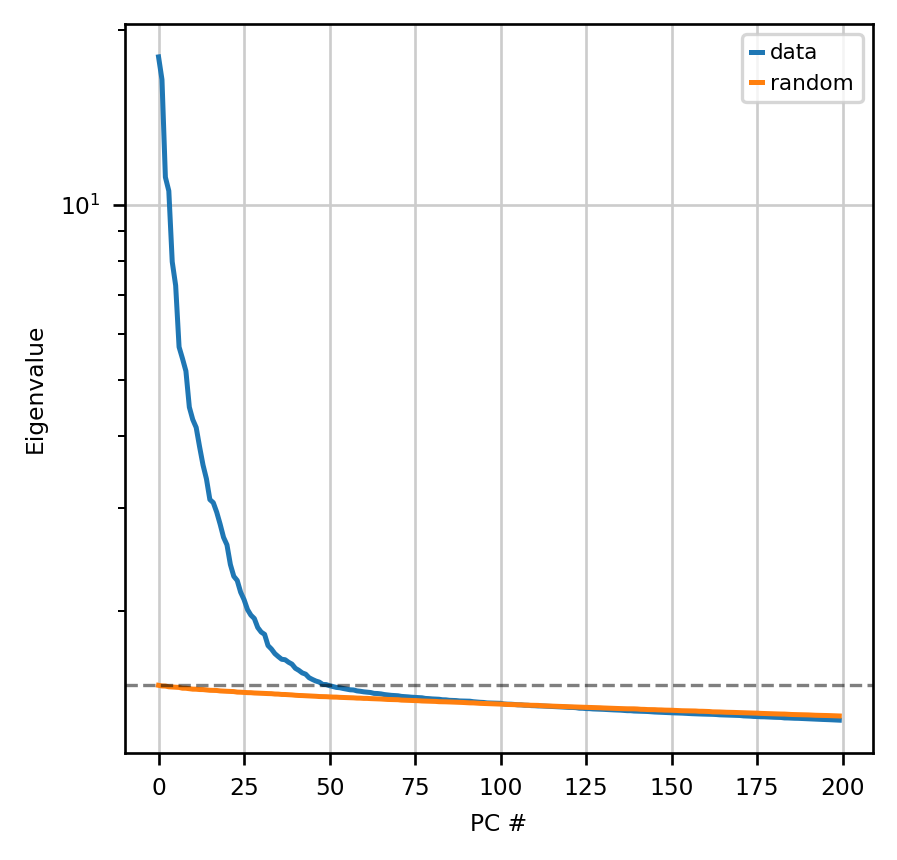

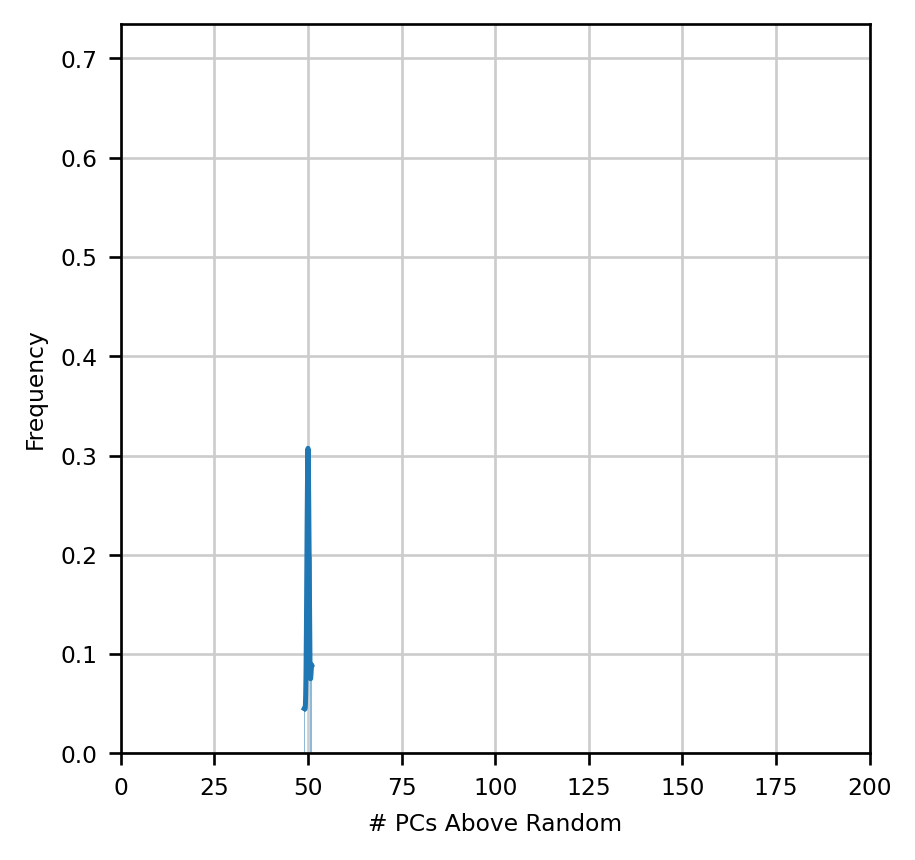

Counting the # of PCs with eigenvalues above random in >95% of trials
Eigenvalue Threshold = 1.49
# Significant PCs = 49


In [ ]:
# Determine # of significant PC dimensions
adata = dew.get_significant_pcs(adata, n_iter = 20, n_comps_test = 200, show_plots=True)

# Alternatively, set the # of dimensions manually
#adata.uns['n_sig_PCs']=150

In [ ]:
# Perform PCA with a specified number of dimensions
sc.pp.pca(adata, n_comps=adata.uns['n_sig_PCs'])

In [ ]:
# Generate the neighbor graph
#sc.pp.neighbors(adata, n_neighbors=10, n_pcs=adata.uns['n_sig_PCs'])

# BBKNN Version - perform PCA & generate neighbor graph
#sc.external.pp.bbknn(adata, use_annoy=False, pynndescent_n_neighbors=3, metric='correlation', neighbors_within_batch=3)

# Harmony Version - perform PCA & generate neighbor graph
sc.external.pp.harmony_integrate(adata, 'batch', basis='X_pca', adjusted_basis='X_pca_harmony')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=adata.uns['n_sig_PCs'], metric='euclidean', use_rep='X_pca_harmony')

2023-08-02 19:50:25,353 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2023-08-02 19:50:42,043 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2023-08-02 19:50:42,319 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2023-08-02 19:51:03,906 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2023-08-02 19:51:24,272 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2023-08-02 19:51:37,754 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2023-08-02 19:51:45,966 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2023-08-02 19:51:53,022 - harmonypy - INFO - Iteration 6 of 10
INFO:harmonypy:Iteration 6 of 10
2023-08-02 19:52:00,133 - harmonypy - INFO - Iteration 7 of 10
INFO:harmonypy:Iteration 7 of 10
2023-08-02 19:52:06,135 - 

In [ ]:
# Generate embedding
sc.tl.umap(adata, n_components=2, spread=1)
#sc.tl.tsne(adata, n_pcs=70)
#sc.tl.draw_graph(adata)

In [ ]:
# Perform graph clustering
sc.tl.leiden(adata, resolution=1.5) # default resolution = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Plot Embeddings

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


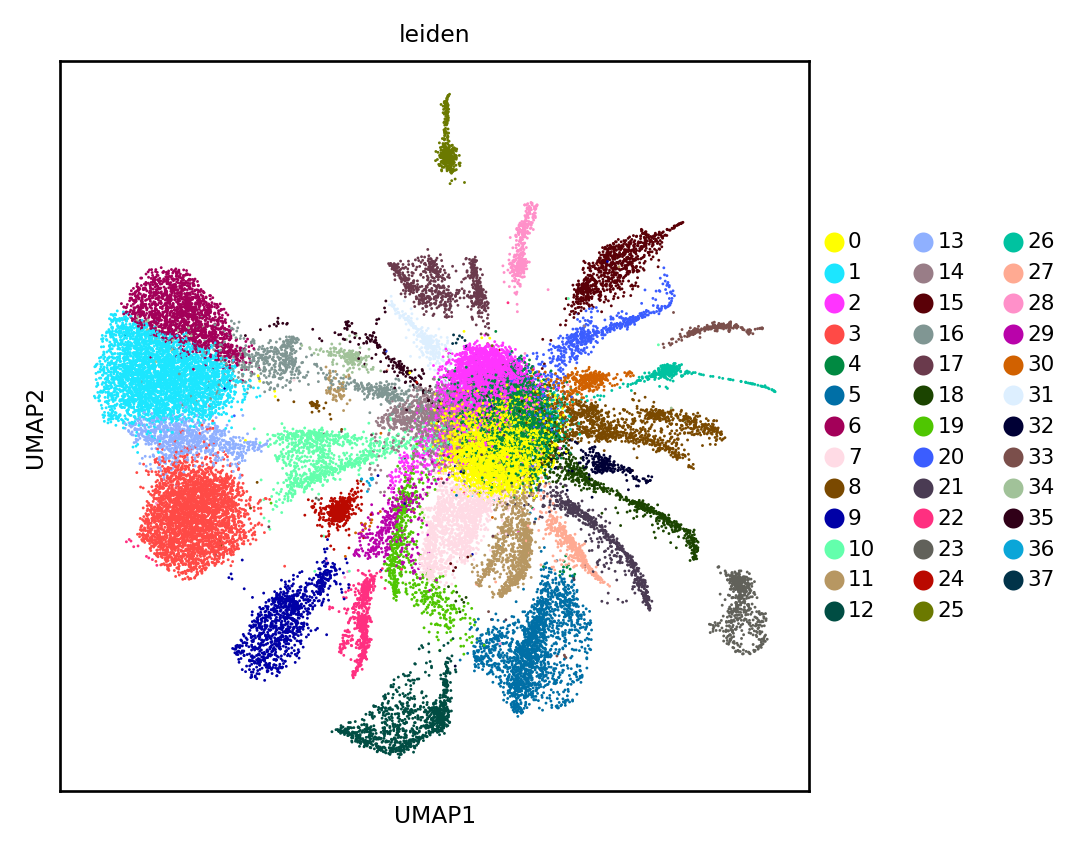

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


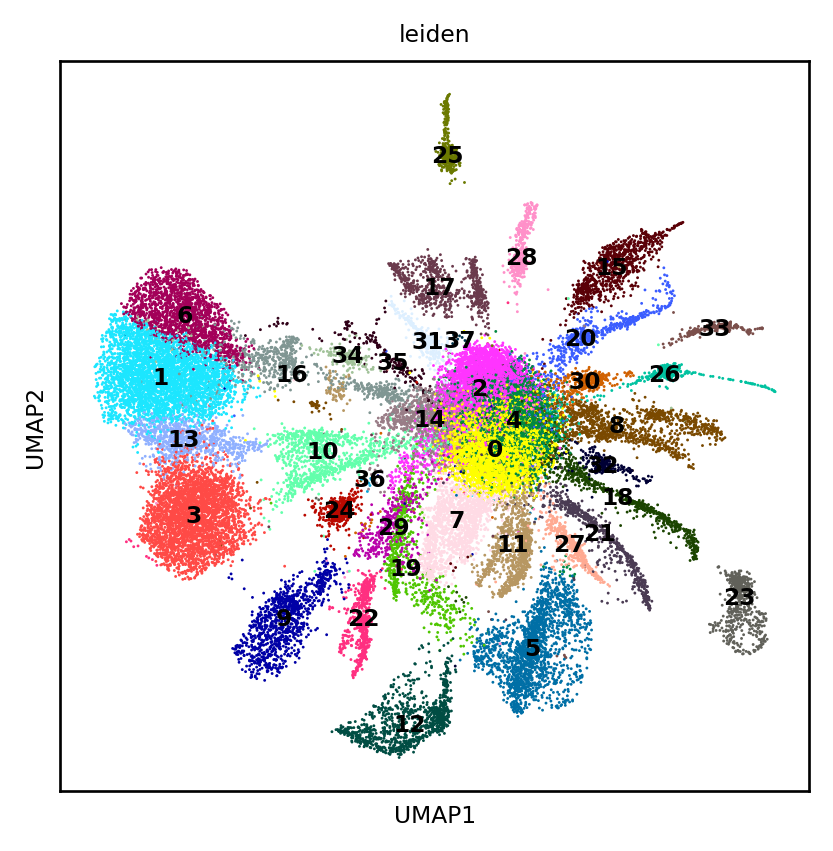

In [ ]:
sc.set_figure_params(dpi=120, figsize=[4,4], fontsize=7)
sc.pl.umap(adata, color=['leiden'])
sc.pl.umap(adata, color=['leiden'], legend_loc='on data')

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


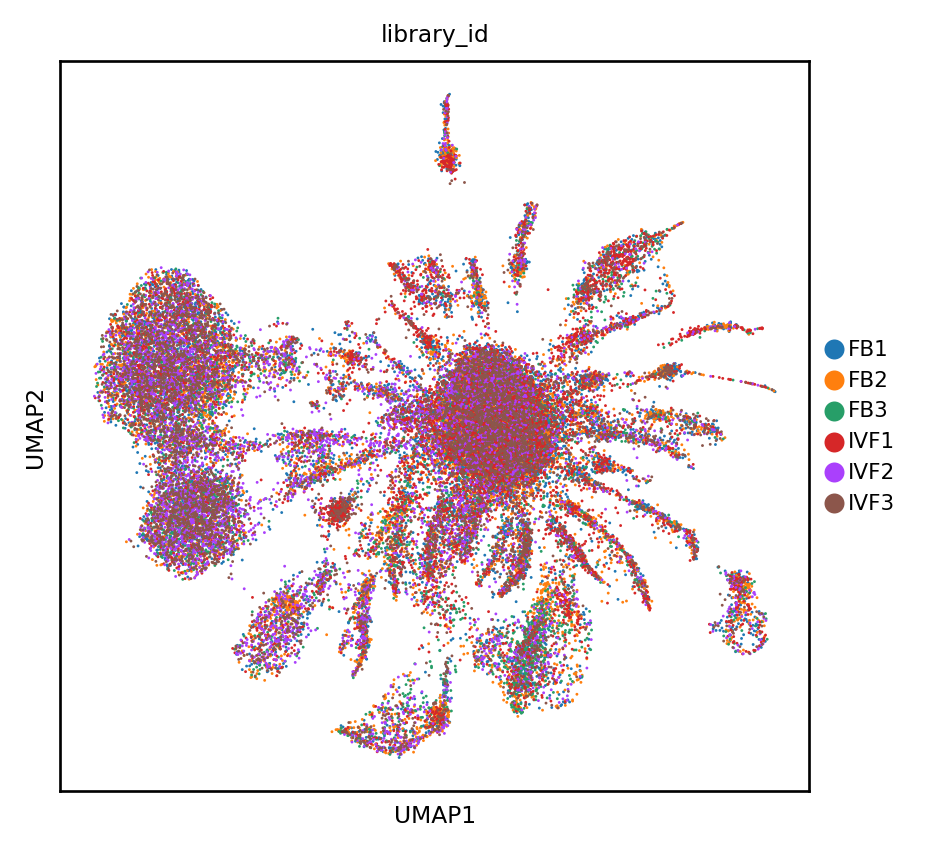

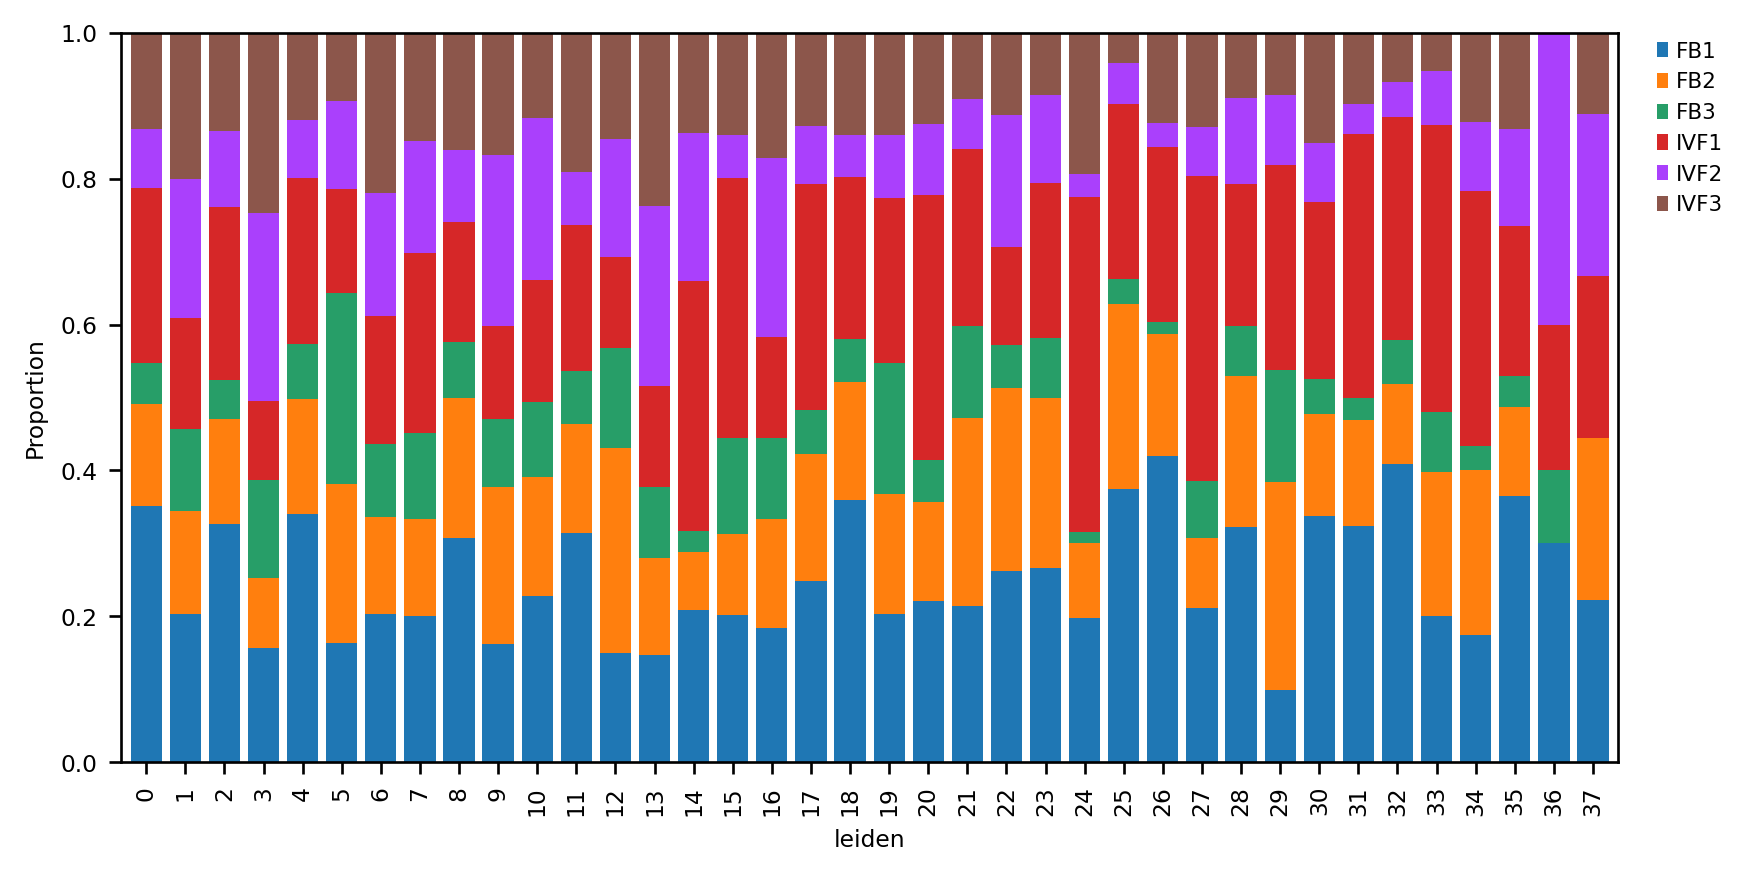

In [ ]:
sc.pl.umap(adata, color=['library_id'], sort_order=True)
dew.plot_stacked_barplot(adata.obs['leiden'], adata.obs['library_id'], normalize='index', fig_width=8)

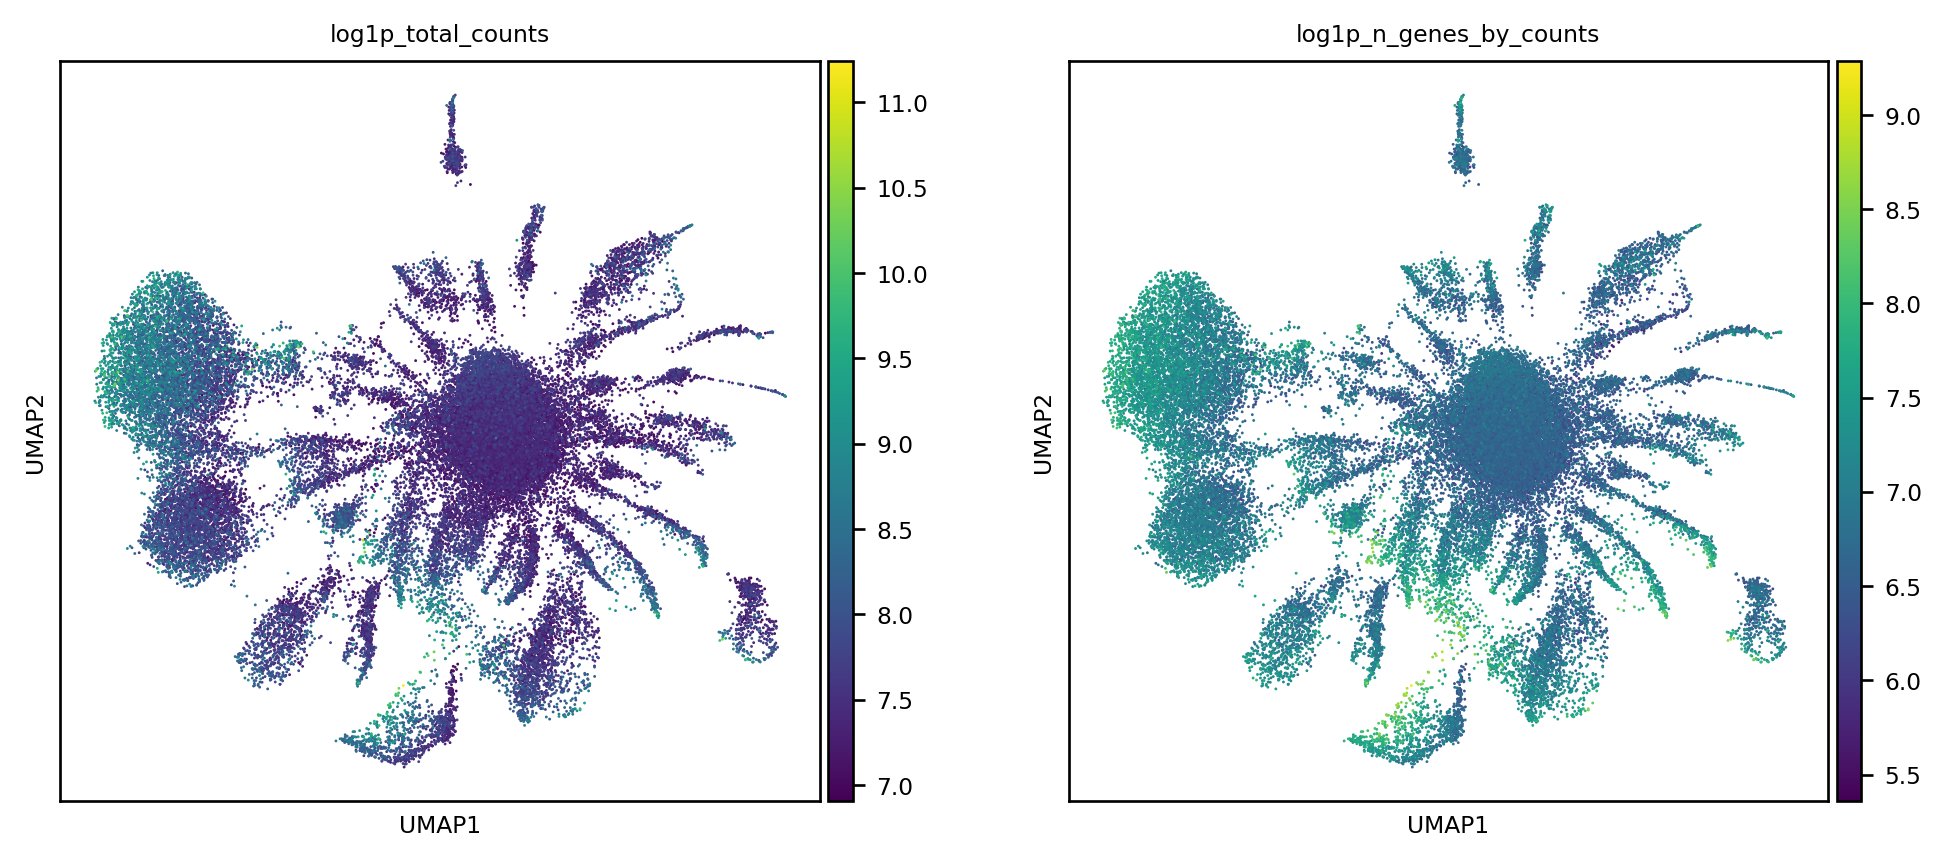

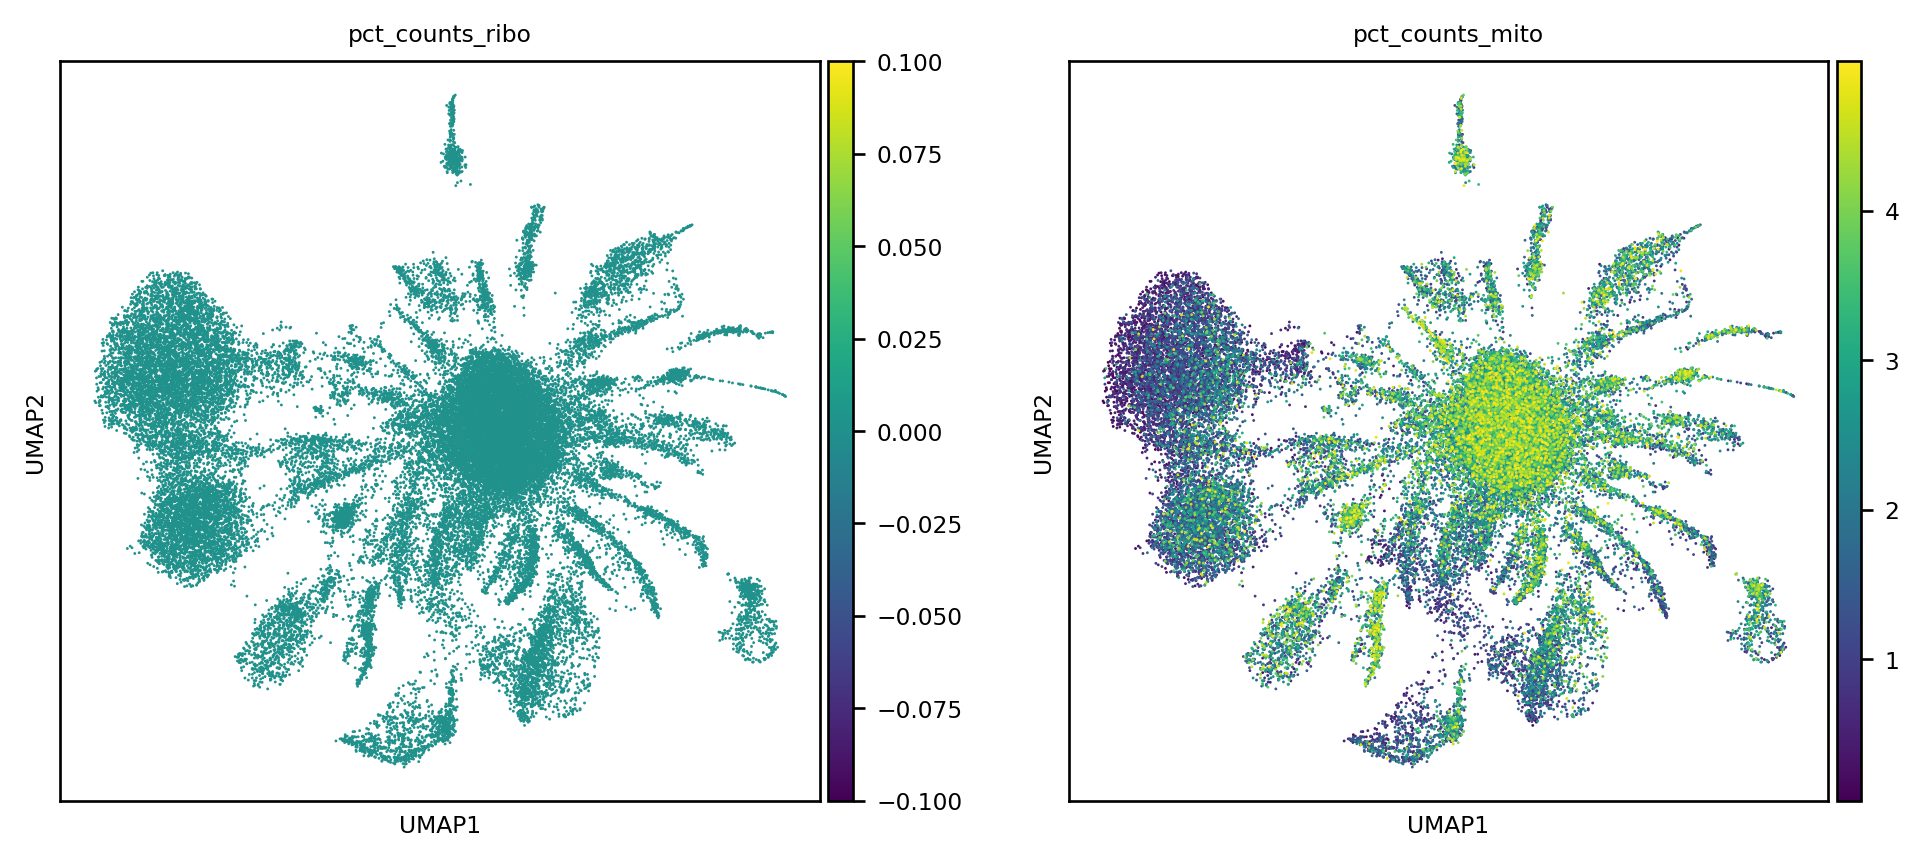

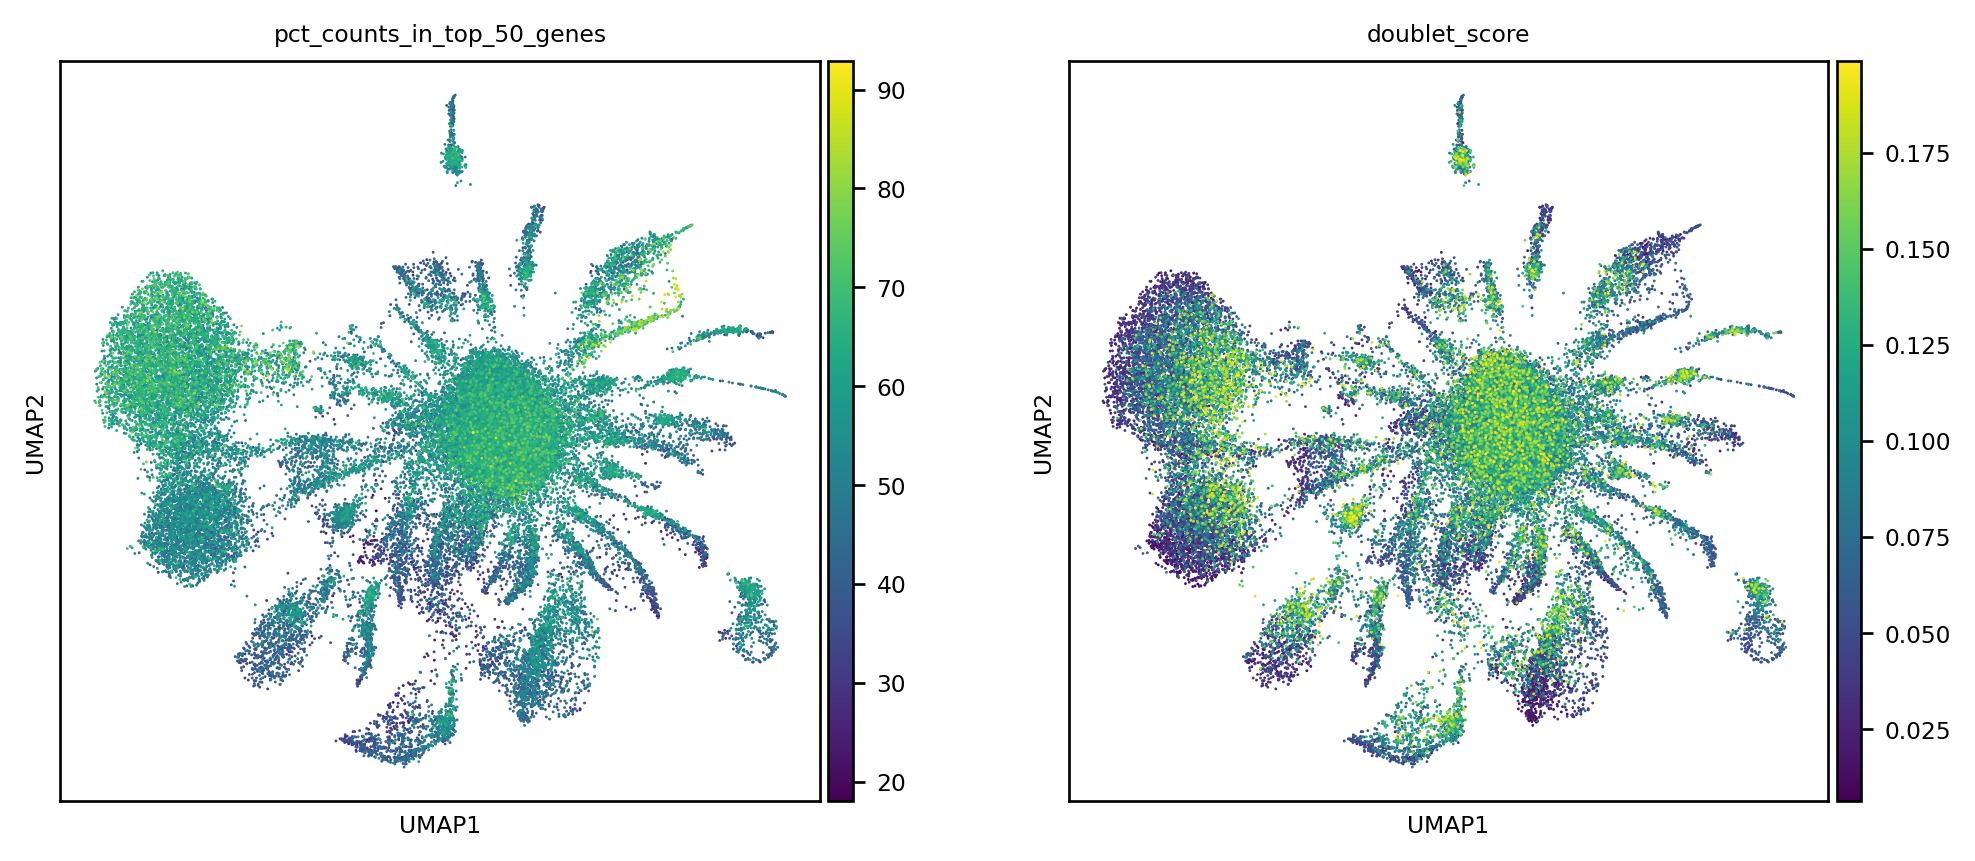

In [ ]:
sc.pl.umap(adata, color=['log1p_total_counts','log1p_n_genes_by_counts'])
sc.pl.umap(adata, color=['pct_counts_ribo','pct_counts_mito'])
sc.pl.umap(adata, color=['pct_counts_in_top_50_genes', 'doublet_score'])

## Rank Genes Groups across Leiden clusters

In [ ]:
sc.tl.rank_genes_groups(adata,
                        'leiden',
                        layer='raw',
                        log_transformed=True,
                        n_genes=100,
                        reference='rest',
                        method='wilcoxon',
                        corr_method='benjamini-hochberg')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=3);

In [ ]:
dew.get_deg_table(adata, ngenes_csv=100, ngenes_disp=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         1         2         3         4         5        6  \
0   Gm42418    Malat1   Gm42418    Samhd1   Gm42418      Csf1    Neat1   
1  AY036118     Usp53     Tpbpa     Rsrp1     Prap1     Tgfb2   Malat1   
2     Tpbpa     Neat1  AY036118       Lbp  AY036118    Abcb1b    Usp53   
3      Igf2  Hand2os1    Col4a1     Cd2ap        C3    Fam13a      Hk2   
4       Afp     Cd2ap     Prap1      Gatm     Tpbpa  Ivns1abp     Lifr   
5    Col4a1    Luc7l2    Prl7d1     Tacc1    Guca2b    Slc5a3  Col12a1   
6    Prl8a9      Xist    Hba-a1      Pbx1     Tgfb2     Prap1     Ugcg   
7     Lars2     Rsrp1     Sparc   Tnfaip2       Afp        C3    Fgfr1   
8    Col4a2      Pbx1    Prl7a2  Adamtsl5    Prl8a9   Tmprss4   Luc7l2   
9     Peg10     Runx1     Tpbpb     Usp53    Col4a1   Adamts9    Runx1   

               7        8        9       10       11       12      13      14  \
0        Gm26917    Ptprc  Slc38a2   Col1a2    Lama1    Runx3    Gatm    Tfpi   
1  C430049B03Rik  Lilrb4a    Egfl7   Col3a1   Col4a1     Irf8   Usp53     H19   
2        Gm47283   Lilr4b    Jade1   Col1a1      Fst    Adam8  Sorbs1  Prl7a1   
3           Peg3      Fyb    Hdac9   Ctla2a     Meg3   Kif13b   Cd2ap  Prl2c5   
4           Noct    Stab1   Sema6d   Col6a3   Tcf7l2      Txk   Tshz2    Krt8   
5            Sct   Dock10   Pecam1   Col6a1    Lamb1    Nabp1    Pbx1  Prl3b1   
6          Taf1d    Cyth4  Rapgef5   Col6a2    Pth1r     Wnk1   Neat1   Krt18   
7          Rbm25     Pld4     Utrn      Eln   Col4a2  Gm26917  Malat1  Prl2c3   
8          Stag3     Cd84    Ptprb    Rxfp1     Ryr2      Id2     A2m   Peg10   
9         Map4k4    Slfn4   Adgrf5  Col11a1  Adamts9     Rgs1   Nampt  Prl7d1   

       15       16             17        18             19      20       21  \
0   Hbb-y  Adamts5           Meg3   Slc13a4           Peg3  Hba-a1  Caskin1   
1  Hba-a1   Rimklb           Rian      Gcgr  C430049B03Rik  Hbb-bs     Tfrc   
2   Hba-x    Htra1         Plagl1      Gjb2           Flt1  Hbb-bt     Peg3   
3  Slc4a1    Procr         Col1a2     Apela         Pappa2  Hba-a2   Mycbp2   
4  Hbb-bt     Erv3         Col1a1    Slc4a2            Fn1   Alas2    Macf1   
5   Nudt4    Abcc5           Mirg     Wfdc2        Gm26917  Tent5c     Car4   
6     Kel   Prl8a2           Gnas   Slc16a3            Dst    Fech     Wnk3   
7  Hbb-bs    Neat1           Dlk1      Car4          Rbm25    Snca   Snap91   
8    Fth1  Slc44a2            Fn1    Maged1          Tpbpb    Bpgm  Slc38a1   
9  Hba-a2     Psap  B830012L14Rik  Tmem150a        Gm47283  Ube2l6    Tacc2   

       22      23       24       25        26       27             28  \
0   Mmrn1   Myh11    Tpbpa    Muc16     Cd226     Meg3           Meg3   
1    Nrp2   Actg2    Hbb-y     Trdn   Gm42418      Afp           Rian   
2    Flt4   Acta2    Sparc   Adam33    Itga2b     Rian         Magel2   
3   Egfl7   Tagln   Hba-a1     Msln    Treml2     Apob           Mirg   
4   Prox1    Mylk   Col4a1  Gm42418    Clec1b     Lrp2          Egfl7   
5    Reln    Tpm2      Afp    Flrt1     Tpbpa     Cubn  B830012L14Rik   
6   Stab1    Flna  Gm42418     Dpp4    Col4a1      Trf           Dlk1   
7  Ccl21a     Des     Actb    Smpd3     Thbs1     Mirg           Mest   
8   Syne1    Tpm1   mt-Co3       C3       Btk  Gm26917           Rtl1   
9   Lyve1  Col1a1    Hba-x     Fgf9  AI504432     Peg3         Plagl1   

              29        30       31        32       33       34        35  \
0  C430049B03Rik   Gm42418   Col1a1    Sprr2f      Cbs  Gm10800       Arc   
1           Ctsq      Il1b   Col1a2      Muc4     Rmst  Gm10801     H3f3b   
2          N4bp2     Tpbpa   Col9a2   Gm42418  Far2os1  Gm21738      Mafa   
3            Dst  AY036118      Lum     Prap1   Atp2b2   Hba-a1      Junb   
4         Fnd3c2     Csf3r   Col3a1     Tpbpa    Cdkl1    Hbb-y       Fos   
5          Las1l       Afp     Igf2    Prxl2a   Unc5cl    Lars2      Egr1   
6            Fn1      Cts3   Col5a1    Prl8a9    Ovgp1      Afp   Adamts1   
7          Ma

## Save Processed h5ad to Wynton

In [ ]:
adata.write('/content/Oqani2025_processed.h5ad', compression='gzip')